In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy.stats import expon
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import io
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from lightgbm.sklearn import Dataset
dataset= pd.read_csv("/content/drive/MyDrive/Dataset/pimaIndianDiabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


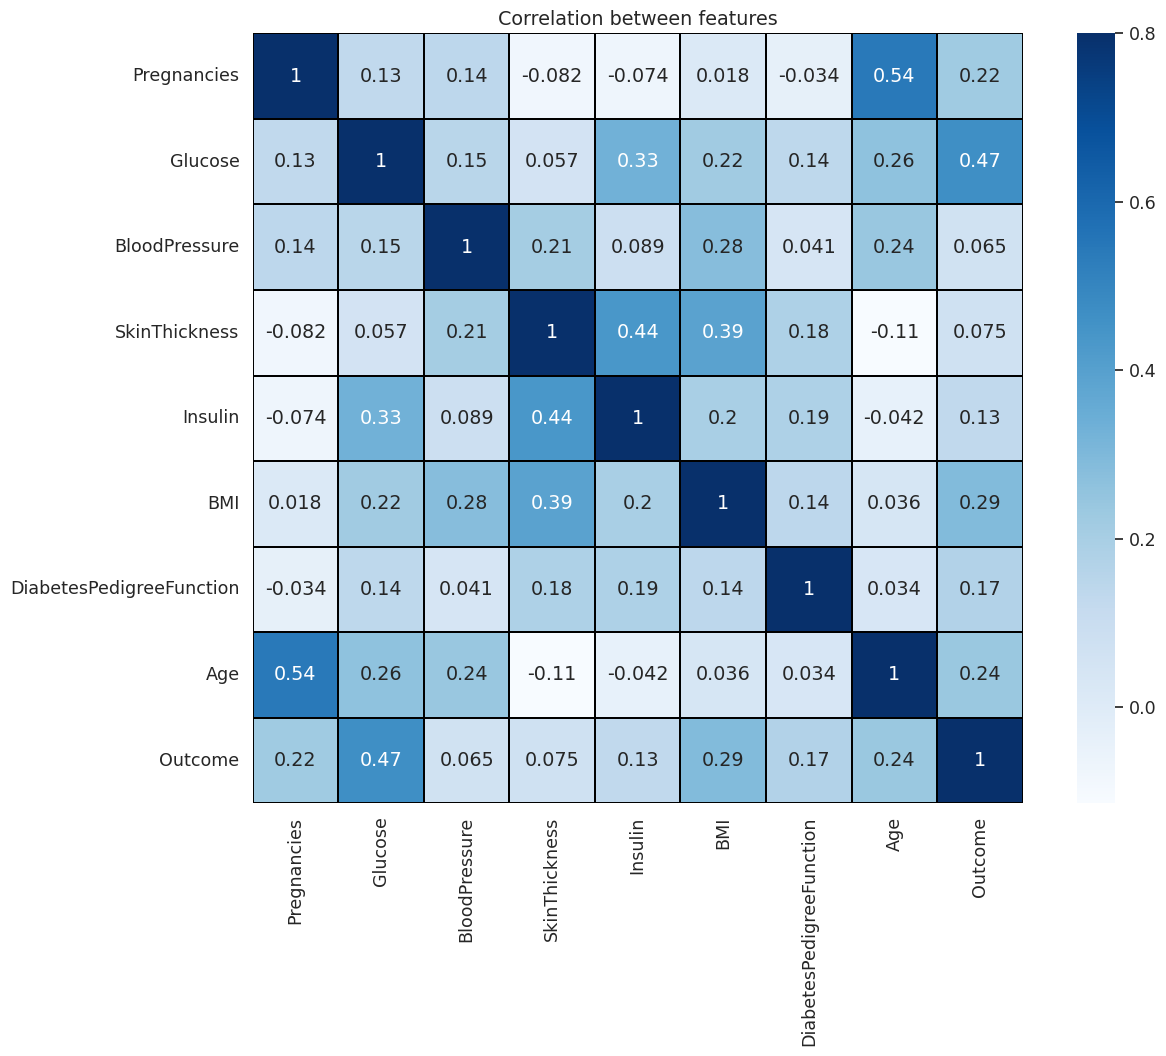

In [ ]:
corr=dataset.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="black")
# sns.heatmap(corr, vmax=.8, linewidths=0.01,
#             square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 79.16666666666666


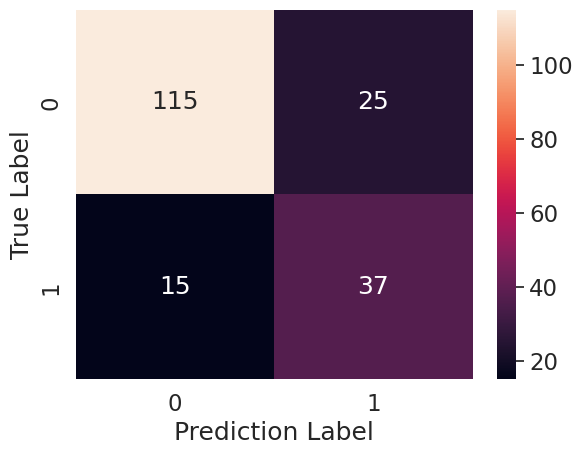

[[115  25]
 [ 15  37]]


In [ ]:
#------------------------Use This---------------------


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

#75% Training & 25% Test dataset [randomly taken]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#------------------------Use This---------------------


LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy:", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
# sns.heatmap(cm, annot=True, fmt='g')
s=sns.heatmap(cm, annot=True, fmt='g')
s.set(xlabel='Prediction Label', ylabel='True Label')

# s.set_title("Logistic Regression Confusion Matrix")
plt.show()

cf_matrix = cm
print(cf_matrix)

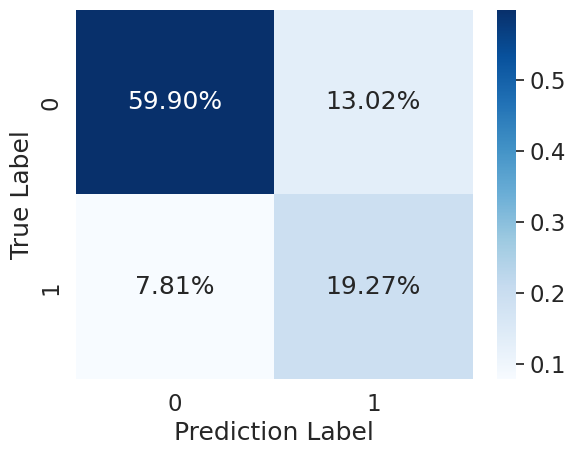

In [ ]:
#------------------------Use This---------------------


s1=sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')
s1.set(xlabel='Prediction Label', ylabel='True Label')
plt.show()

In [ ]:
#------------------------Use This---------------------


print("Accuracy:", LR.score(X_test, y_test)*100)

Accuracy: 79.16666666666666


Accuracy: 73.4375


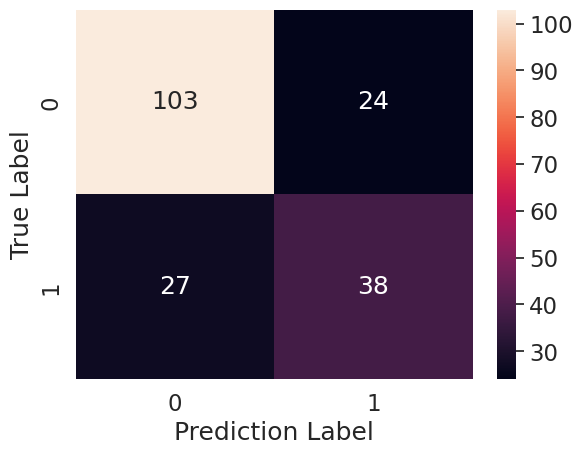

In [ ]:
#------------------------Use This---------------------


#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy:", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)

s=sns.heatmap(cm, annot=True, fmt='g')
s.set(xlabel='Prediction Label', ylabel='True Label')
plt.show()

# sns.heatmap(cm, annot=True, fmt='g')
# plt.show()

In [ ]:
#------------------------Use This---------------------


print("Accuracy:", DT.score(X_test, y_test)*100)

Accuracy: 73.4375


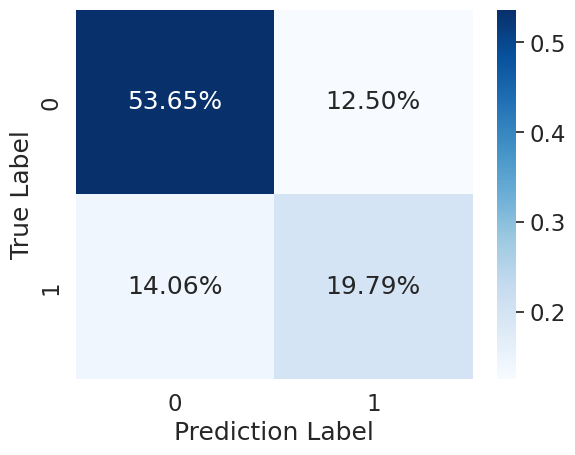

In [ ]:
#------------------------Use This---------------------


s2=sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')
s2.set(xlabel='Prediction Label', ylabel='True Label')
plt.show()

Accuracy: 79.6875


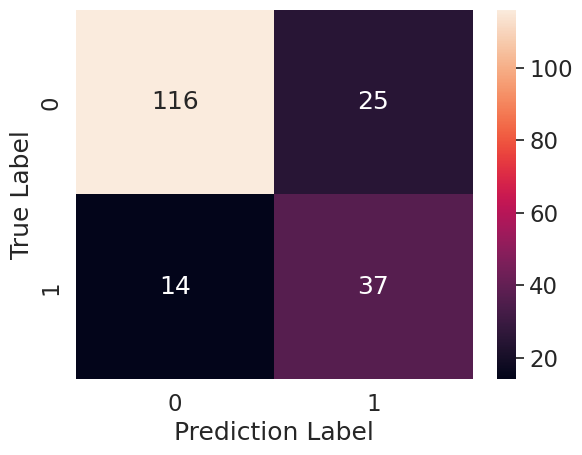

In [ ]:
#------------------------Use This---------------------


#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy:", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)

s=sns.heatmap(cm, annot=True, fmt='g')
s.set(xlabel='Prediction Label', ylabel='True Label')
plt.show()

# sns.heatmap(cm, annot=True, fmt='g')
# plt.show()

In [ ]:
#------------------------Use This---------------------


print("Accuracy:", model.score(X_test, y_test)*100)

Accuracy: 79.6875


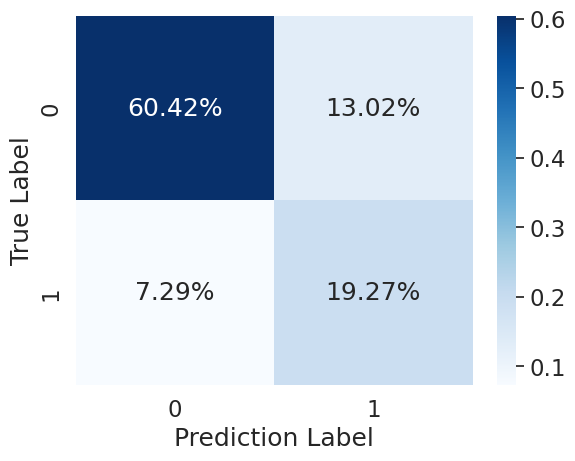

In [ ]:
#------------------------Use This---------------------


s2=sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')
s2.set(xlabel='Prediction Label', ylabel='True Label')
plt.show()

In [ ]:
#------------------------Use This---------------------


import warnings
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




#Data Preprocessing Tools
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder,
                                   MinMaxScaler)
from sklearn import metrics
from sklearn.model_selection import train_test_split


#Metrics
from sklearn.metrics import (accuracy_score,
                             auc,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)

# Stats
from scipy.stats import kurtosis, skew

# model algorithams
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis)

In [ ]:
#------------------------Use This---------------------


# loading data
# df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv', delimiter = ',', encoding = 'utf-8')
print(f'We have {dataset.shape[0]} instances and the following {dataset.shape[1]} attributes:')
dataset.head(5)

We have 768 instances and the following 9 attributes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#------------------------Use This---------------------


dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
#------------------------Use This---------------------


null_acc = round (max(dataset.Outcome.values.mean(), 1 - dataset.Outcome.values.mean()), 2)

print(f'\nNull Accuracy Score: {null_acc*100}% \n' )

print('This is the Baseline accuracy our model we need to cross.\n')


Null Accuracy Score: 65.0% 

This is the Baseline accuracy our model we need to cross.



In [ ]:
#------------------------Use This---------------------


def impute_median(var,data):
    imputed_data = data[data[var].notnull()]
    imputed_data = imputed_data[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return imputed_data

    #------------------------Use This---------------------


#Feature Engineering for data visualization
missing_val_columns = ['BloodPressure','SkinThickness','Insulin','Glucose','BMI']
for col in missing_val_columns:
    med0,med1 = impute_median(col,dataset)[col]
    dataset.loc[(dataset['Outcome'] == 0 ) & (dataset[col].isnull()), col]=med0
    dataset.loc[(dataset['Outcome'] == 1 ) & (dataset[col].isnull()), col]=med1

    #------------------------Use This---------------------


dataset['bmi_cat'] = pd.cut(dataset['BMI'], bins = [-1, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
dataset['age_cat'] = pd.cut(dataset['Age'], bins = [-1, 45,60,200], labels = ['Adults','Mid Adults','Elderly'])
dataset['glucose_cat'] = pd.cut(dataset['Glucose'], bins = [-1,90,160,199], labels = ['Low', 'Normal', 'High'])
dataset['insulin_cat'] = pd.cut(dataset['Insulin'], bins = [-1,22,79,900], labels = ['Low', 'Normal', 'High'])
dataset['bp_cat'] = pd.cut(dataset['BloodPressure'], bins = [-1,80,115,130], labels = ['Normal', 'High','Critically High'])

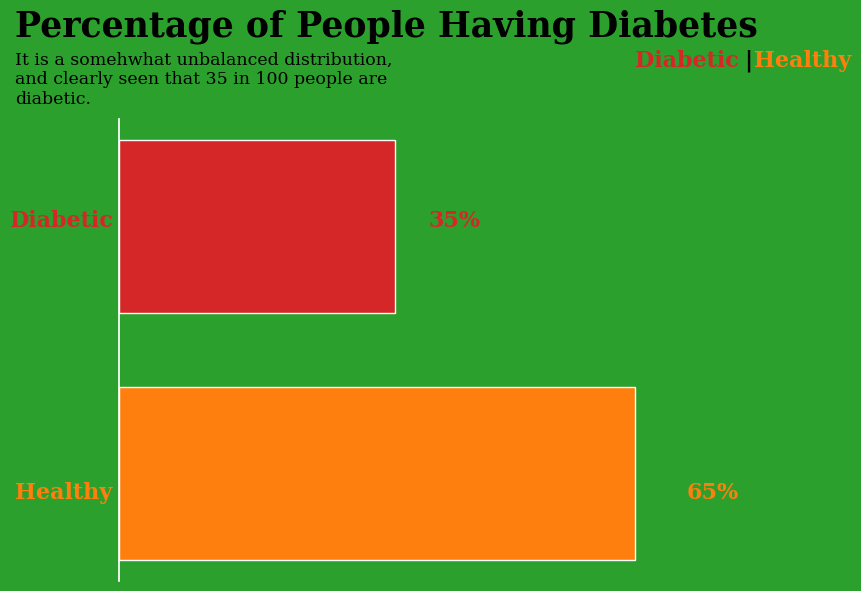

In [ ]:
#------------------------Use This---------------------


import matplotlib.pyplot as plt
import pandas as pd

# Define your colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Your existing code
from matplotlib.font_manager import FontProperties

x = pd.DataFrame(dataset.groupby(['Outcome']).Outcome.count())
fig , ax = plt.subplots(figsize=(7,6))
ax.barh([1], x.Outcome[1], height=0.7, color= colors[3])
ax.barh([0], x.Outcome[0], height=0.7, color= colors[1])

fig.patch.set_facecolor(colors[2])
ax.set_facecolor(colors[2])

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# font = FontProperties()
# font.set_family('serif')

matplotlib.rc('font', family='Serif')
# plt.text(-100,-0.1, 'Healthy',{'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':colors[1]})
# matplotlib.rcParams['font.family'] = ['sans-serif']
plt.text(-100,-0.1, 'Healthy',{'weight':'bold','size': '16','style':'normal', 'color':colors[1]})
plt.text(550,-0.1, '65%',{'weight':'bold' ,'size':'16','color':colors[1]})
plt.text(-105,1, 'Diabetic', {'weight':'bold','size': '16','style':'normal', 'color':colors[3]})
plt.text(300,1, '35%',{'weight':'bold','size':'16','color':colors[3]})

plt.text(-100,1.77, 'Percentage of People Having Diabetes' ,{ 'size': '25','weight':'bold', 'color':'black'})
plt.text(500,1.65, 'Diabetic ', {'weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors[3]})
plt.text(605,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(615,1.65, 'Healthy', {'weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':colors[1]})
plt.text(-100,1.5, 'It is a somehwhat unbalanced distribution,\nand clearly seen that 35 in 100 people are\ndiabetic.',
        {'size':'12.5','color': 'black'})
plt.show()


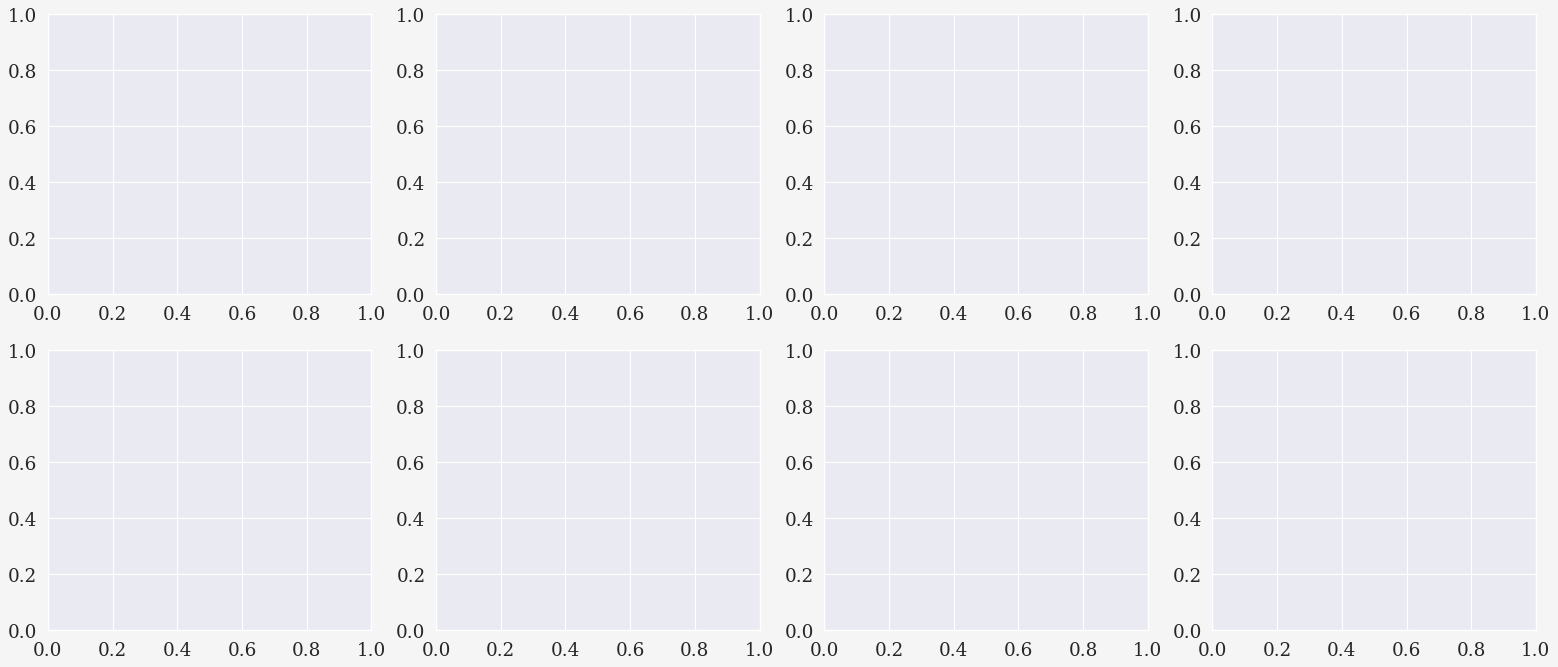

In [ ]:
#------------------------Use This---------------------


import seaborn as sns
from scipy.stats import skew

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(24, 10), dpi=80)
fig.patch.set_facecolor('#f6f5f5')
axes = ax.ravel()

feat_df = dataset.iloc[:, :8]



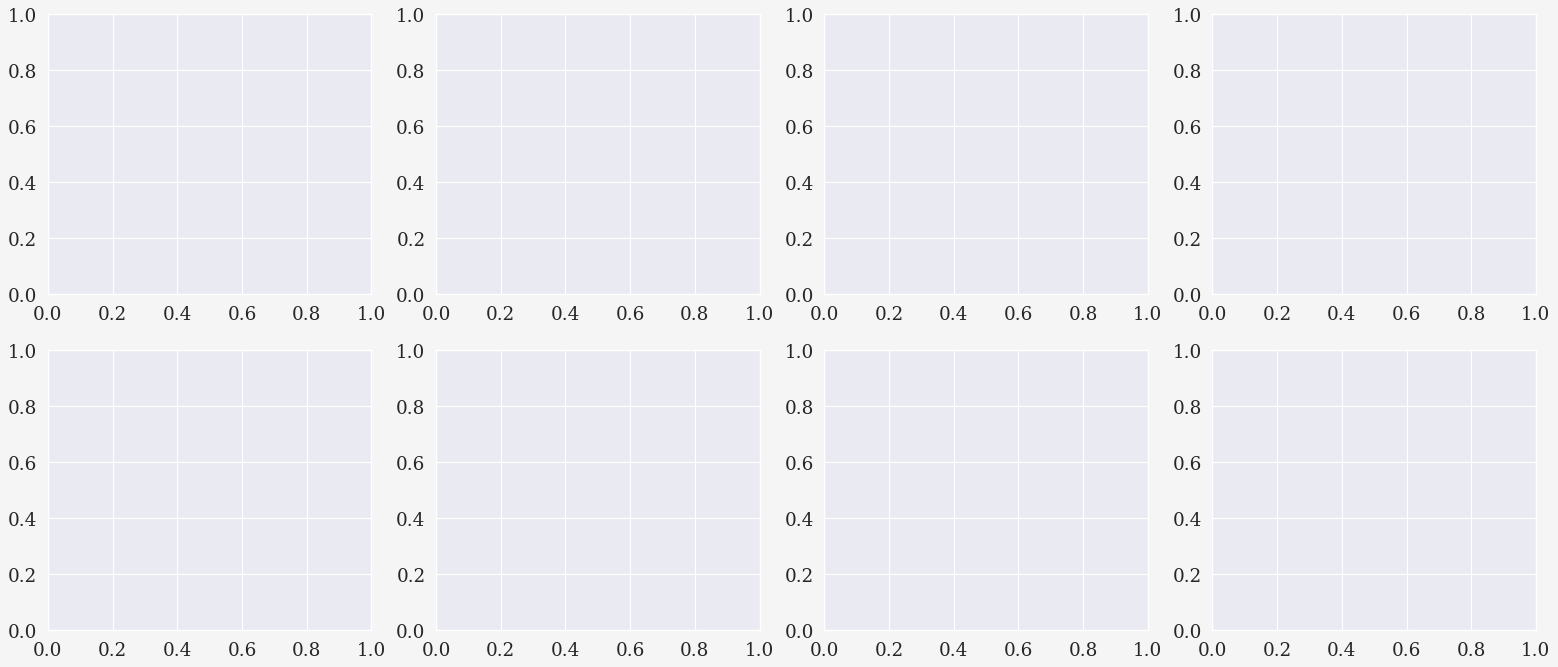

In [ ]:
#------------------------Use This---------------------


fig,ax = plt.subplots(nrows = 2, ncols = 4, figsize = (24,10),dpi=80)
fig.patch.set_facecolor('#f6f5f5')
axes = ax.ravel()

feat_df = dataset.iloc[:,:8]

In [ ]:



df=dataset
df.drop(['age_cat','bmi_cat','glucose_cat','insulin_cat','bp_cat'],axis=1,inplace=True)


In [ ]:



df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


<Axes: >

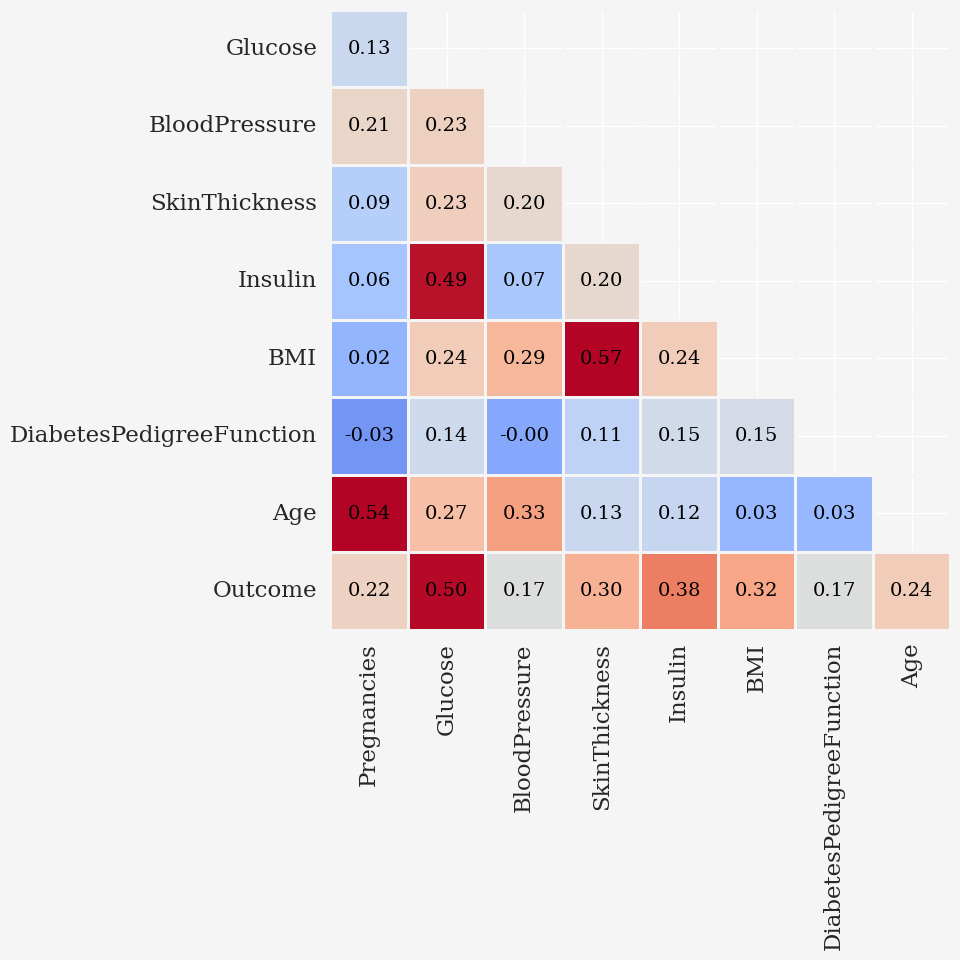

In [ ]:
#------------------------Use This---------------------


# preprocessing - label encoding and numerical value scaling
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mm = MinMaxScaler()

df_copy = df.copy()

cols = df.columns[:-1]
## normalizing with MinMaxScaler of numerical features
df[cols] = mm.fit_transform(df[cols])

# correlation map for all the features
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 12))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

mask = mask[1:, :-1]
corr = df_corr.iloc[1:, :-1].copy()

# Change colormap to a different one
colormap = 'coolwarm'

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=colormap,
            vmin=-0.15, vmax=0.5, cbar_kws={"shrink": 0.5}, ax=ax, cbar=False,
            linewidth=1, linecolor='#f6f5f5', square=True, annot_kws={'size': 14, 'color': 'black'})



In [ ]:
#------------------------Use This---------------------


df[cols] = df[cols].replace(0,1e-5)

#------------------------Use This---------------------


X = df.drop(['Outcome'],axis=1)
feat = df.drop(['Outcome'],axis=1).columns
y = df['Outcome']
#---------------------------------------------------------------------------
#---------------------------------------------------------------------------
df['Insulin'] = X['Insulin'].apply(lambda x: np.log(x))
df['Glucose'] = X['Glucose'].apply(lambda x: np.log(x))
df['BMI'] = X['BMI'].apply(lambda x: np.log(x))
df['SkinThickness'] = X['SkinThickness'].apply(lambda x: np.log(x))
df['BloodPressure'] = X['BloodPressure'].apply(lambda x: np.log(x))
df['Age'] = X['Age'].apply(lambda x: np.log(x))
df['DiabetesPedigreeFunction'] = X['DiabetesPedigreeFunction'].apply(lambda x: np.log(x))

#------------------------Use This---------------------



def plot_ready(x,pos):
    fig = plt.figure(figsize = (24,8),dpi = 60)

    gs = fig.add_gridspec(10,24)
    gs.update(wspace = 1, hspace = 0.05)


    ax2 = fig.add_subplot(gs[2:9,:12])
    ax1 = fig.add_subplot(gs[2:9,12:])
    # axes list
    axes = [ ax1,ax2]

    # setting of axes; visibility of axes and spines turn off
    for ax in axes:
        ax.set_facecolor('#f6f5f5')

        for loc in ['left', 'right', 'top', 'bottom']:
            ax.spines[loc].set_visible(False)

    fig.patch.set_facecolor('#f6f5f5')

    ax2.axes.get_xaxis().set_visible(True)
    ax2.axes.get_yaxis().set_visible(True)
    ax2.tick_params(labelsize=16)
    ax1.tick_params(labelsize=16)
    sns.violinplot(df[x], ax =ax1,cut =0,
                   color = colors[3],inner = None,
                   alpha = 0.6,linewidth = 3,edgecolor = 'solidblack', saturation =0.75 )
    sns.boxenplot(x= df[x], ax = ax1, saturation = 0.9,palette =[colors[4]],width=0.05)
    sns.violinplot(X[x], ax =ax2,cut =0,
                   color = colors[1],inner = None,
                   alpha = 0.6,linewidth = 3,edgecolor = 'solidblack', saturation =0.75 )
    sns.boxenplot(x = X[x], ax = ax2, saturation = 0.9,palette =[colors[4]],width=0.05)
    plt.xlabel('Updated '+x)
    fig.text(pos,0.75,f'{x} V/S log({x})',{'weight':'bold','color': 'black', 'size':35})
    return fig

In [ ]:



X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.186899,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.106370,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.271739,0.186899,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000010
4,0.000010,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.106370,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.271739,0.186899,0.243354,0.115713,0.433333


In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier


#Helper Function for Classification

# X = df.drop(['Outcome'],axis=1)
# y = df['Outcome']

#, 'Insulin'
X=df.drop(['Outcome', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'SkinThickness', 'Glucose','Pregnancies', 'BloodPressure'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 0)
def make_classification(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 0)
    accuracy,precision,recall,f1,conf_mat= [],[],[],[],[]

    random_state = 0







    ##classifiers
    classifiers = []
    classifiers.append(SVC(random_state=random_state, probability = True))
    classifiers.append(LogisticRegression(random_state = random_state))
    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(KNeighborsClassifier())

    classifiers.append(XGBClassifier(random_state = random_state))
    classifiers.append(LGBMClassifier(random_state = random_state))
    classifiers.append(LinearDiscriminantAnalysis())
    classifiers.append(QuadraticDiscriminantAnalysis())
    classifiers.append(ExtraTreesClassifier())

    classifiers.append(GaussianNB())
    classifiers.append(GaussianProcessClassifier(random_state=random_state))
    classifiers.append(MLPClassifier(random_state=random_state))
    classifiers.append(BaggingClassifier(random_state=random_state))


    for classifier in classifiers:

        #classifier and fitting
        clf = classifier
        clf.fit(X_train,y_train)

        #predictions
        y_preds = clf.predict(X_test)
        y_probs = clf.predict_proba(X_test)

        # metrics
        accuracy.append((round(accuracy_score(y_test,y_preds),2))*100)
        precision.append((round(precision_score(y_test,y_preds),2))*100)
        recall.append((round(recall_score(y_test,y_preds),2))*100)
        f1.append((round(f1_score(y_test,y_preds),2))*100)
        # auc.append((round (roc_auc_score(y_test,y_probs[:,1]), 2))*100)
        conf_mat.append(confusion_matrix(y_test,y_preds))
    results_df = pd.DataFrame({"Algorithms":["SVC","DecisionTree","AdaBoost",
                                     "RandomForest","GradientBoosting",
                                     "KNeighboors","LogisticRegression",
                                     "XGBoost", "LightGBM","LDA","QDA","ExtraTrees","GaussianNB",
                                               "GaussianProcessClassifier", "MLPClassifier",
                                               "BaggingClassifier"],
                               "Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,
                        "Confusion Matrix":conf_mat,
                        })

        # results_df = pd.DataFrame({"Accuracy Score":accuracy,"Precision Score":precision,
        #                 "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
        #                 "Confusion Matrix":conf_mat,
        #                 "Algos":["SVC","DecisionTree","AdaBoost",
        #                              "RandomForest","GradientBoosting",
        #                              "KNeighboors","LogisticRegression",
        #                              "XGBoost", "LightGBM","LDA","QDA","ExtraTrees"]})


    results = (results_df.sort_values(by = ['Accuracy Score'], ascending = False)
                  .reset_index(drop =  True))
    # results=results_df
    return classifiers,results
classifiers,results = make_classification(X,y)

[LightGBM] [Info] Number of positive: 206, number of negative: 370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357639 -> initscore=-0.585627
[LightGBM] [Info] Start training from score -0.585627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
results

,Algorithms,Accuracy Score,Precision Score,Recall Score,f1 Score,Confusion Matrix
0,GaussianProcessClassifier,89.0,80.0,85.0,83.0,"[[117, 13], [9, 53]]"
1,KNeighboors,88.0,85.0,74.0,79.0,"[[122, 8], [16, 46]]"
2,ExtraTrees,88.0,83.0,77.0,80.0,"[[120, 10], [14, 48]]"
3,MLPClassifier,88.0,81.0,82.0,82.0,"[[118, 12], [11, 51]]"
4,AdaBoost,87.0,81.0,77.0,79.0,"[[119, 11], [14, 48]]"
5,GradientBoosting,87.0,79.0,81.0,80.0,"[[117, 13], [12, 50]]"
6,XGBoost,87.0,84.0,74.0,79.0,"[[121, 9], [16, 46]]"
7,SVC,86.0,73.0,89.0,80.0,"[[110, 20], [7, 55]]"
8,RandomForest,86.0,78.0,81.0,79.0,"[[116, 14], [12, 50]]"
9,LightGBM,86.0,82.0,73.0,77.0,"[[120, 10], [17, 45]]"


In [ ]:




#Helper Function for Classification

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier

X = df.drop(['Outcome'],axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 0)
def make_classification(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 0)
    accuracy,precision,recall,f1,conf_mat= [],[],[],[],[]

    random_state = 0
    ##classifiers
    classifiers = []
    classifiers.append(SVC(random_state=random_state, probability = True))
    classifiers.append(LogisticRegression(random_state = random_state))
    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(KNeighborsClassifier())

    classifiers.append(XGBClassifier(random_state = random_state))
    classifiers.append(LGBMClassifier(random_state = random_state))
    classifiers.append(LinearDiscriminantAnalysis())
    classifiers.append(QuadraticDiscriminantAnalysis())
    classifiers.append(ExtraTreesClassifier())

    classifiers.append(GaussianNB())
    classifiers.append(GaussianProcessClassifier(random_state=random_state))
    classifiers.append(MLPClassifier(random_state=random_state))
    classifiers.append(BaggingClassifier(random_state=random_state))


    for classifier in classifiers:

        #classifier and fitting
        clf = classifier
        clf.fit(X_train,y_train)

        #predictions
        y_preds = clf.predict(X_test)
        y_probs = clf.predict_proba(X_test)

        # metrics
        accuracy.append((round(accuracy_score(y_test,y_preds),2))*100)
        precision.append((round(precision_score(y_test,y_preds),2))*100)
        recall.append((round(recall_score(y_test,y_preds),2))*100)
        f1.append((round(f1_score(y_test,y_preds),2))*100)
        # auc.append((round (roc_auc_score(y_test,y_probs[:,1]), 2))*100)
        conf_mat.append(confusion_matrix(y_test,y_preds))
    results_df = pd.DataFrame({"Algorithms":["SVC","DecisionTree","AdaBoost",
                                     "RandomForest","GradientBoosting",
                                     "KNeighboors","LogisticRegression",
                                     "XGBoost", "LightGBM","LDA","QDA","ExtraTrees","GaussianNB",
                                               "GaussianProcessClassifier", "MLPClassifier",
                                               "BaggingClassifier"],
                               "Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,
                        "Confusion Matrix":conf_mat,
                        })


    result1 = (results_df.sort_values(by = ['Accuracy Score'], ascending = False)
                  .reset_index(drop =  True))
    # results=results_df
    return classifiers,result1
classifiers,result1 = make_classification(X,y)
result1

[LightGBM] [Info] Number of positive: 206, number of negative: 370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357639 -> initscore=-0.585627
[LightGBM] [Info] Start training from score -0.585627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Algorithms,Accuracy Score,Precision Score,Recall Score,f1 Score,Confusion Matrix
0,KNeighboors,94.0,89.0,92.0,90.0,"[[123, 7], [5, 57]]"
1,XGBoost,92.0,85.0,92.0,88.0,"[[120, 10], [5, 57]]"
2,LightGBM,91.0,82.0,90.0,86.0,"[[118, 12], [6, 56]]"
3,GradientBoosting,90.0,82.0,89.0,85.0,"[[118, 12], [7, 55]]"
4,BaggingClassifier,90.0,83.0,85.0,84.0,"[[119, 11], [9, 53]]"
5,ExtraTrees,89.0,82.0,82.0,82.0,"[[119, 11], [11, 51]]"
6,AdaBoost,86.0,75.0,84.0,79.0,"[[113, 17], [10, 52]]"
7,RandomForest,86.0,75.0,84.0,79.0,"[[113, 17], [10, 52]]"
8,LogisticRegression,86.0,81.0,74.0,77.0,"[[119, 11], [16, 46]]"
9,GaussianProcessClassifier,86.0,81.0,76.0,78.0,"[[119, 11], [15, 47]]"


In [ ]:
from imblearn.over_sampling import RandomOverSampler


#Helper Function for Classification

X = df.drop(['Outcome'],axis=1)
y = df['Outcome']
# Apply RandomOverSampler oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, shuffle=True, random_state=0)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
def make_classification(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 0)
    accuracy,precision,recall,f1,conf_mat= [],[],[],[],[]

    random_state = 0

    ##classifiers
    classifiers = []
    classifiers.append(SVC(random_state=random_state, probability = True))
    classifiers.append(LogisticRegression(random_state = random_state))
    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(KNeighborsClassifier())

    classifiers.append(XGBClassifier(random_state = random_state))
    classifiers.append(LGBMClassifier(random_state = random_state))
    classifiers.append(LinearDiscriminantAnalysis())
    classifiers.append(QuadraticDiscriminantAnalysis())
    classifiers.append(ExtraTreesClassifier())

    classifiers.append(GaussianNB())
    classifiers.append(GaussianProcessClassifier(random_state=random_state))
    classifiers.append(MLPClassifier(random_state=random_state))
    classifiers.append(BaggingClassifier(random_state=random_state))


    for classifier in classifiers:

        #classifier and fitting
        clf = classifier
        clf.fit(X_train,y_train)

        #predictions
        y_preds = clf.predict(X_test)
        y_probs = clf.predict_proba(X_test)

        # metrics
        accuracy.append((round(accuracy_score(y_test,y_preds),2))*100)
        precision.append((round(precision_score(y_test,y_preds),2))*100)
        recall.append((round(recall_score(y_test,y_preds),2))*100)
        f1.append((round(f1_score(y_test,y_preds),2))*100)
        # auc.append((round (roc_auc_score(y_test,y_probs[:,1]), 2))*100)
        conf_mat.append(confusion_matrix(y_test,y_preds))
    results_df = pd.DataFrame({"Algorithms":["SVC","DecisionTree","AdaBoost",
                                     "RandomForest","GradientBoosting",
                                     "KNeighbors","LogisticRegression",
                                     "XGBoost", "LightGBM","LDA","QDA","ExtraTrees","GaussianNB",
                                               "GaussianProcessClassifier", "MLPClassifier",
                                               "BaggingClassifier"],
                               "Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,
                        "Confusion Matrix":conf_mat,
                        })

    result2 = (results_df.sort_values(by = ['f1 Score'], ascending = False)
                  .reset_index(drop =  True))
    # results=results_df
    return classifiers,result2
classifiers,result2 = make_classification(X,y)
result2

[LightGBM] [Info] Number of positive: 206, number of negative: 370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357639 -> initscore=-0.585627
[LightGBM] [Info] Start training from score -0.585627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Algorithms,Accuracy Score,Precision Score,Recall Score,f1 Score,Confusion Matrix
0,KNeighbors,94.0,89.0,92.0,90.0,"[[123, 7], [5, 57]]"
1,XGBoost,92.0,85.0,92.0,88.0,"[[120, 10], [5, 57]]"
2,LightGBM,91.0,82.0,90.0,86.0,"[[118, 12], [6, 56]]"
3,GradientBoosting,90.0,82.0,89.0,85.0,"[[118, 12], [7, 55]]"
4,BaggingClassifier,90.0,83.0,85.0,84.0,"[[119, 11], [9, 53]]"
5,ExtraTrees,88.0,78.0,85.0,82.0,"[[115, 15], [9, 53]]"
6,AdaBoost,86.0,75.0,84.0,79.0,"[[113, 17], [10, 52]]"
7,RandomForest,85.0,73.0,85.0,79.0,"[[110, 20], [9, 53]]"
8,GaussianProcessClassifier,86.0,81.0,76.0,78.0,"[[119, 11], [15, 47]]"
9,LogisticRegression,86.0,81.0,74.0,77.0,"[[119, 11], [16, 46]]"


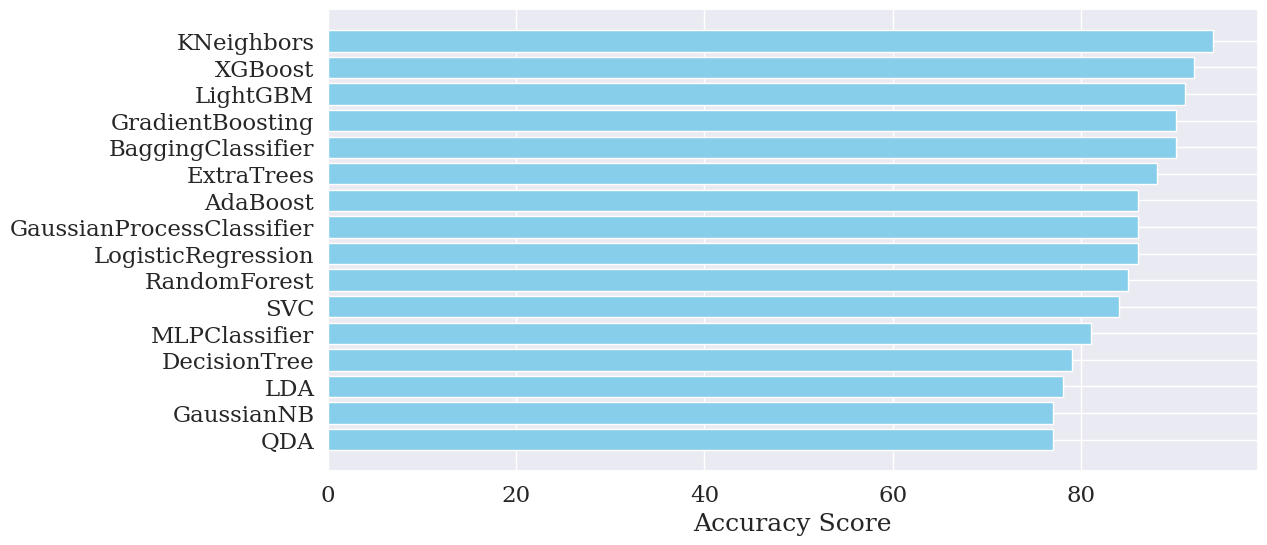

In [ ]:
# Sort result2 by "Accuracy Score"
result2_sorted = result2.sort_values(by="Accuracy Score", ascending=False)

# Plotting the comparison graph for accuracy
plt.figure(figsize=(12, 6))
plt.barh(result2_sorted["Algorithms"], result2_sorted["Accuracy Score"], color='skyblue')
plt.xlabel('Accuracy Score')
plt.gca().invert_yaxis()  # Reverse the order of y-axis labels
plt.show()
